In [28]:
import pandas as pd
import joblib
from sklearn.preprocessing import LabelEncoder
from src.prediction import load_model_and_scaler, predict_single, preprocess_new_data



## Preprocess Testing

In [29]:
from src.preprocessing import DataPreprocessing
# Initialize the pipeline
pipeline = DataPreprocessing(file_path="data/diabetes_prediction_dataset.csv")

# Get DataFrame info
pipeline.data_info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [30]:
# Get summary statistics
print(pipeline.describe_data())



                 age  hypertension  heart_disease            bmi  \
count  100000.000000  100000.00000  100000.000000  100000.000000   
mean       41.885856       0.07485       0.039420      27.320767   
std        22.516840       0.26315       0.194593       6.636783   
min         0.080000       0.00000       0.000000      10.010000   
25%        24.000000       0.00000       0.000000      23.630000   
50%        43.000000       0.00000       0.000000      27.320000   
75%        60.000000       0.00000       0.000000      29.580000   
max        80.000000       1.00000       1.000000      95.690000   

         HbA1c_level  blood_glucose_level       diabetes  
count  100000.000000        100000.000000  100000.000000  
mean        5.527507           138.058060       0.085000  
std         1.070672            40.708136       0.278883  
min         3.500000            80.000000       0.000000  
25%         4.800000           100.000000       0.000000  
50%         5.800000           14

In [31]:
# Check for missing values
missing_values = pipeline.check_missing_values()
print("Missing values:\n", missing_values)



Missing values:
 gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64


In [32]:
# Preprocess data
X, y = pipeline.preprocess_data()

# Split data into training and test sets
X_train, X_test, y_train, y_test = pipeline.split_data(X, y)

# Display shapes
print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

Train shape: (80000, 12)
Test shape: (20000, 12)


### Model Testing

In [33]:
from src.model import ModelPipeline

# Initialize the ModelPipeline
pipeline = ModelPipeline(model_dir='models/models')


In [34]:
# Train a model
rf_model = pipeline.train_random_forest(X_train, y_train)




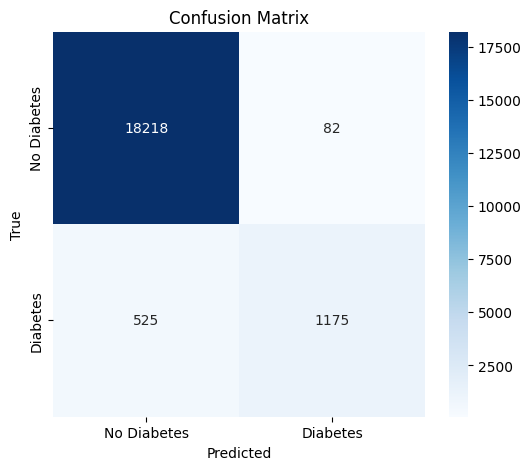

In [35]:
# Evaluate the model
accuracy, confusion_mat, report = pipeline.evaluate_model(rf_model, X_test, y_test)

# Plot confusion matrix
pipeline.plot_confusion_matrix(confusion_mat)



In [18]:
# Save the model
pipeline.save_model(rf_model)


Model successfully saved as models/models/retrained_model_7.pkl


'models/models/retrained_model_7.pkl'

In [41]:
# Initialize pipeline
pipeline = ModelPipeline(model_dir='models/models')

# Load training data
X_train = pd.read_csv('data/train/X_train.csv')
y_train = pd.read_csv('data/train/y_train.csv')

# Retrain the model with new data
retrained_model = pipeline.retrain_model(X_train, y_train)



/home/codespace/.local/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Model successfully saved as models/models/retrained_model_9.pkl


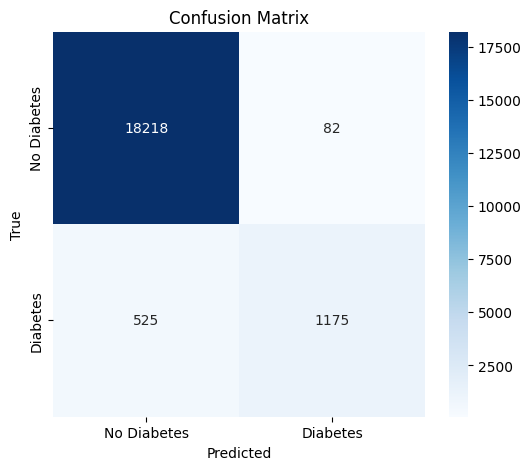

In [44]:
# Load test data
new_X_test = pd.read_csv('data/test/X_test.csv')
new_y_test = pd.read_csv('data/test/y_test.csv')

# Evaluate the retrained model
acc, cm, report = pipeline.evaluate_model(retrained_model, new_X_test, new_y_test)

# Visualize results
pipeline.plot_confusion_matrix(cm)


/home/codespace/.local/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Model successfully saved as models/models/retrained_model_8.pkl


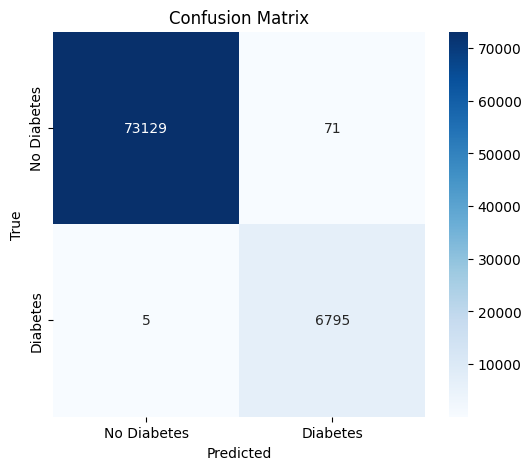

In [46]:
X_new_train = pd.read_csv('data/train/X_train.csv')
y_new_train= pd.read_csv('data/train/y_train.csv')

# Retrain the model with new data
retrained_model = pipeline.retrain_model(X_new_train, y_new_train)

# Evaluate the retrained model
acc, cm, report = pipeline.evaluate_model(retrained_model, X_new_train, y_new_train)

# Visualize results
pipeline.plot_confusion_matrix(cm)

### Prediction Testing

In [54]:
from src.prediction import DataPrediction


ImportError: cannot import name 'DataPrediction' from 'src.prediction' (/workspaces/diabetes_prediction-ML_Pipeline_Summative/src/prediction.py)

In [53]:

# Initialize the Prediction class with paths to the saved model, scaler, and encoder
prediction = DataPrediction(model_path="models/models/retrained_model_7.pkl", 
                        scaler_path="models/scaler.pkl", 
                        encoder_path="models/encoder.pkl")

# Example new data as a pandas DataFrame
new_data = pd.DataFrame({
    'gender': ['Female'],
    'age': [45],
    'hypertension': [0],
    'heart_disease': [0],
    'bmi': [27.5],
    'HbA1c_level': [5.7],
    'blood_glucose_level': [110],
    'smoking_history': ['never']
})

# Make a prediction for the new data
result = prediction.predict_single(new_data)

print(f"Prediction: {result}")


NameError: name 'DataPrediction' is not defined